In [280]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#lines below let allow multiple results from a line of code to be shown e.g. df.head() + df.columns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#this allows us to see all of our columns or rows in jupyter notebook
pd.set_option('display.max_columns', None)

#plotly provides a robust library of interactive charts, where you can explore the data in numerous ways,
import plotly.offline as py
import plotly_express as px
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)
import missingno as msno

In [281]:
os.getcwd()

'C:\\Users\\Sam Cannon\\Desktop\\Python\\Data Sets'

In [282]:
os.chdir('C:\\Users\\Sam Cannon\\Desktop\\Python\\Data Sets')

In [283]:
train = pd.read_csv('dengue_train.csv')
labels = pd.read_csv('dengue_labels.csv')

In [284]:
train.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,4/30/1990,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,5/7/1990,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,5/14/1990,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,5/21/1990,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,5/28/1990,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [285]:
labels.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [286]:
data = train.merge(labels, on = ['city', 'year', 'weekofyear'])

In [287]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1455
Data columns (total 25 columns):
city                                     1456 non-null object
year                                     1456 non-null int64
weekofyear                               1456 non-null int64
week_start_date                          1456 non-null object
ndvi_ne                                  1262 non-null float64
ndvi_nw                                  1404 non-null float64
ndvi_se                                  1434 non-null float64
ndvi_sw                                  1434 non-null float64
precipitation_amt_mm                     1443 non-null float64
reanalysis_air_temp_k                    1446 non-null float64
reanalysis_avg_temp_k                    1446 non-null float64
reanalysis_dew_point_temp_k              1446 non-null float64
reanalysis_max_air_temp_k                1446 non-null float64
reanalysis_min_air_temp_k                1446 non-null float64
reanalysis_precip

Want to transform the week start date to datetime

In [288]:
data['week_start_date'] = pd.to_datetime(data['week_start_date'])

Extract the day of the year from the datetime column

In [291]:
data['day_of_year'] = data['week_start_date'].dt.dayofyear

In [297]:
data['quarter_of_year'] = data['week_start_date'].dt.quarter

In [298]:
data.dtypes

city                                             object
year                                              int64
weekofyear                                        int64
week_start_date                          datetime64[ns]
ndvi_ne                                         float64
ndvi_nw                                         float64
ndvi_se                                         float64
ndvi_sw                                         float64
precipitation_amt_mm                            float64
reanalysis_air_temp_k                           float64
reanalysis_avg_temp_k                           float64
reanalysis_dew_point_temp_k                     float64
reanalysis_max_air_temp_k                       float64
reanalysis_min_air_temp_k                       float64
reanalysis_precip_amt_kg_per_m2                 float64
reanalysis_relative_humidity_percent            float64
reanalysis_sat_precip_amt_mm                    float64
reanalysis_specific_humidity_g_per_kg           

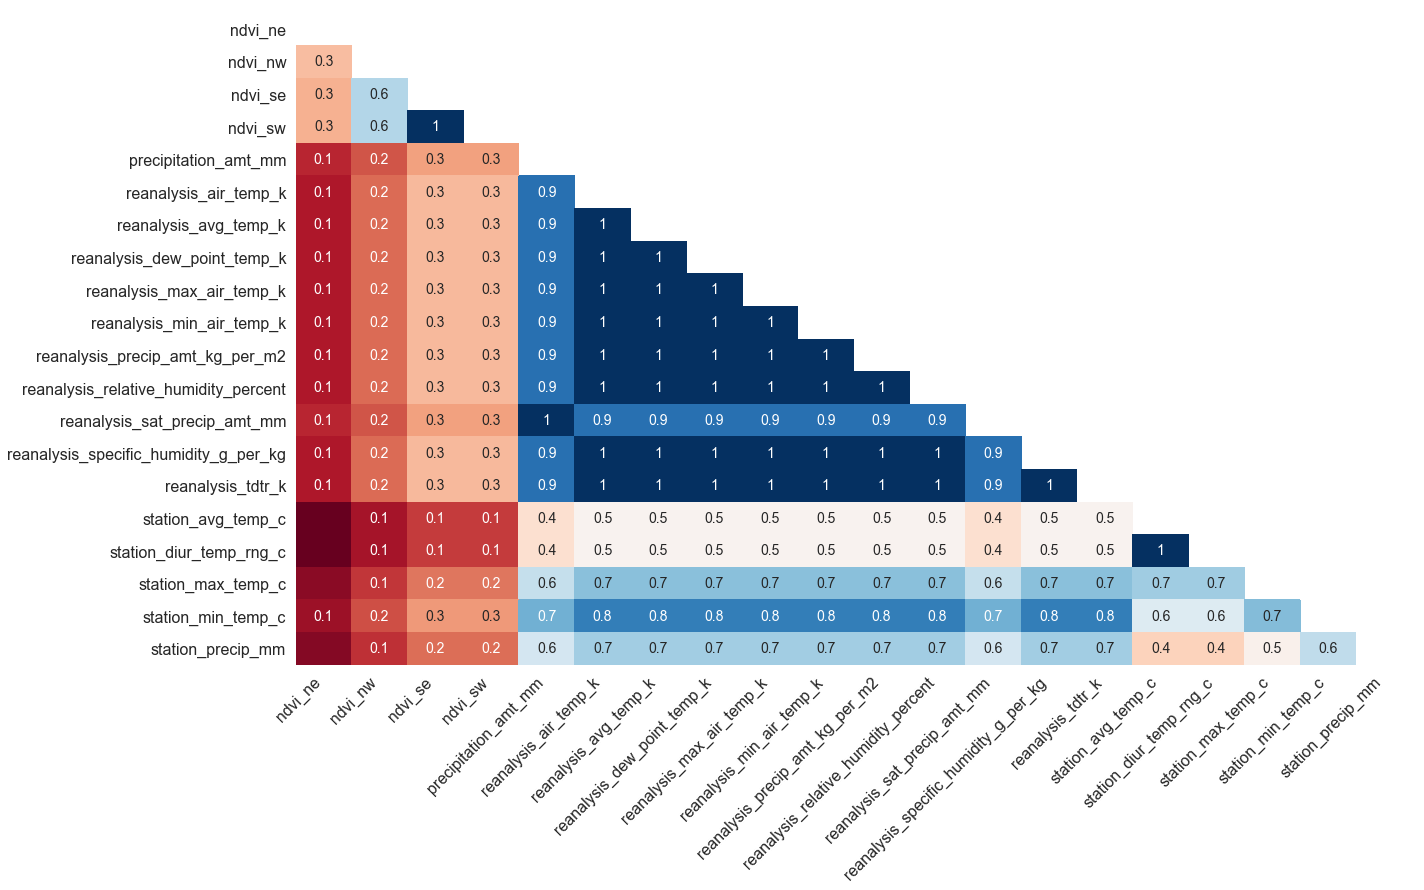

In [299]:
msno.heatmap(data)

In [300]:
corr = data.corr()

In [301]:
colnames = corr.columns

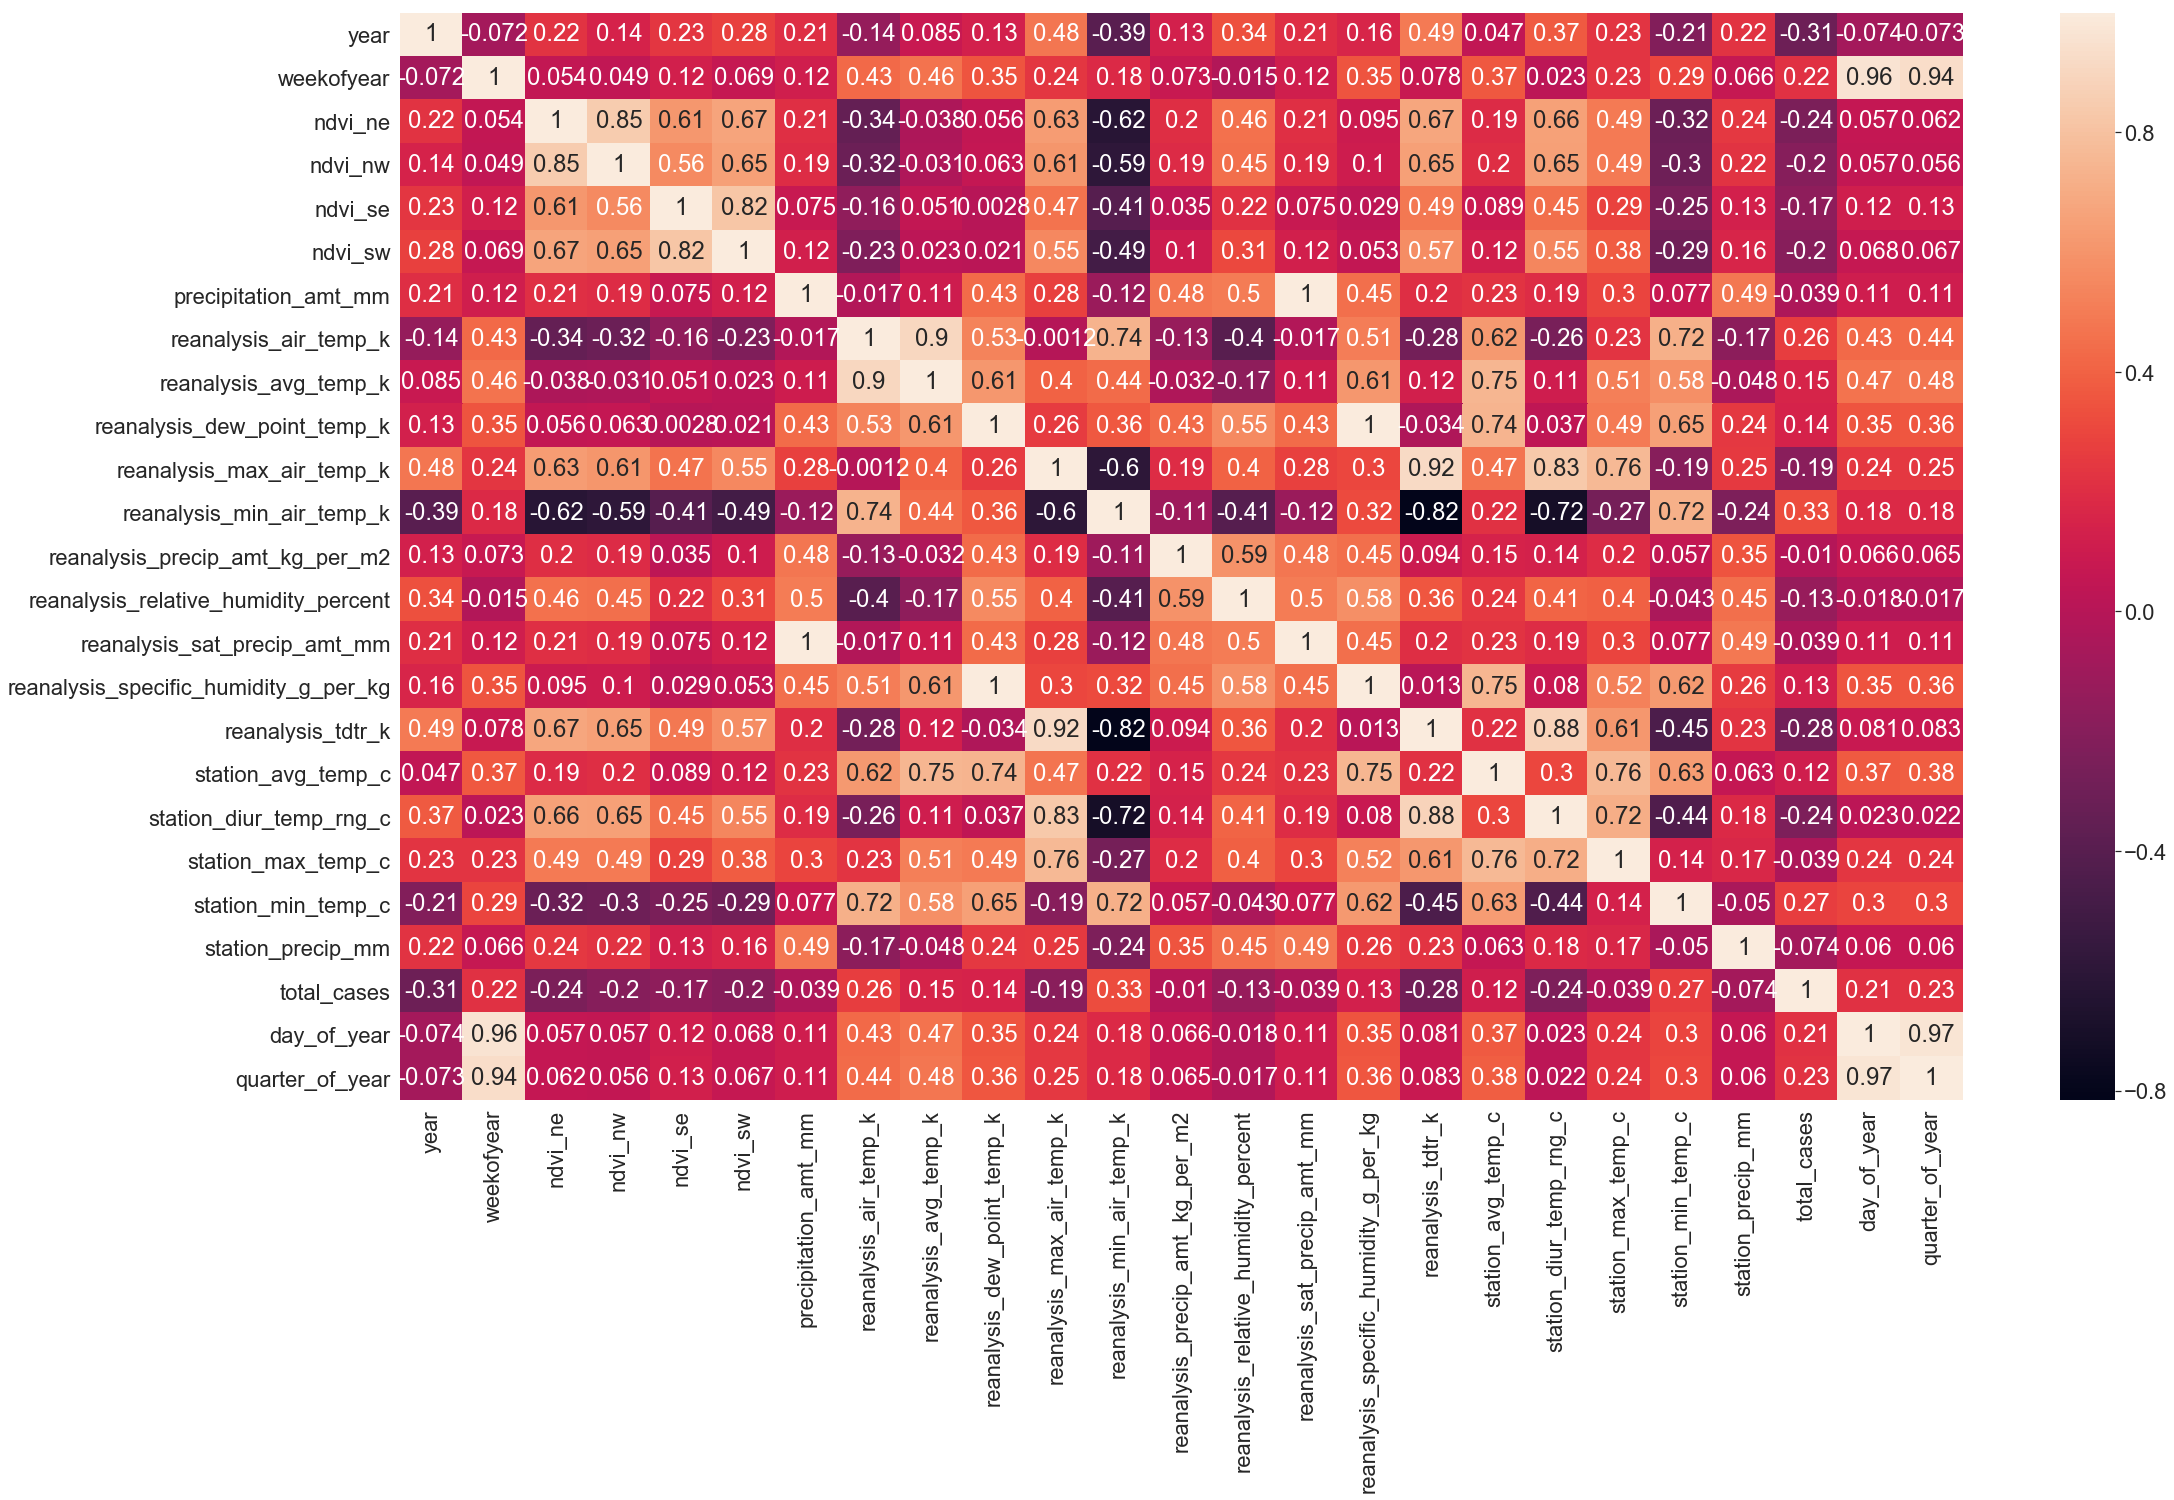

In [302]:
sns.set(font_scale=2)
fig, ax = plt.subplots(figsize=(35,20))
sns.heatmap(corr, annot = True)

In [303]:
data.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,day_of_year,quarter_of_year
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4,120,2
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5,127,2
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4,134,2
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3,141,2
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6,148,2


In [304]:
data.shape

(1456, 27)

In [305]:
data.dtypes

city                                             object
year                                              int64
weekofyear                                        int64
week_start_date                          datetime64[ns]
ndvi_ne                                         float64
ndvi_nw                                         float64
ndvi_se                                         float64
ndvi_sw                                         float64
precipitation_amt_mm                            float64
reanalysis_air_temp_k                           float64
reanalysis_avg_temp_k                           float64
reanalysis_dew_point_temp_k                     float64
reanalysis_max_air_temp_k                       float64
reanalysis_min_air_temp_k                       float64
reanalysis_precip_amt_kg_per_m2                 float64
reanalysis_relative_humidity_percent            float64
reanalysis_sat_precip_amt_mm                    float64
reanalysis_specific_humidity_g_per_kg           

In [306]:
data.duplicated().sum()

0

In [307]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1455
Data columns (total 27 columns):
city                                     1456 non-null object
year                                     1456 non-null int64
weekofyear                               1456 non-null int64
week_start_date                          1456 non-null datetime64[ns]
ndvi_ne                                  1262 non-null float64
ndvi_nw                                  1404 non-null float64
ndvi_se                                  1434 non-null float64
ndvi_sw                                  1434 non-null float64
precipitation_amt_mm                     1443 non-null float64
reanalysis_air_temp_k                    1446 non-null float64
reanalysis_avg_temp_k                    1446 non-null float64
reanalysis_dew_point_temp_k              1446 non-null float64
reanalysis_max_air_temp_k                1446 non-null float64
reanalysis_min_air_temp_k                1446 non-null float64
reanalysi

In [308]:
data.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,day_of_year,quarter_of_year
count,1456.000000,1456.000000,1262.000000,1404.000000,1434.000000,1434.000000,1443.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1443.000000,1446.000000,1446.000000,1413.000000,1413.000000,1436.000000,1442.000000,1434.000000,1456.000000,1456.000000,1456.000000
mean,2001.031593,26.503434,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,299.225578,295.246356,303.427109,295.719156,40.151819,82.161959,45.760388,16.746427,4.903754,27.185783,8.059328,32.452437,22.102150,39.326360,24.675137,179.500000,2.495192
std,5.408314,15.019437,0.140531,0.119999,0.073860,0.083903,43.715537,1.362420,1.261715,1.527810,3.234601,2.565364,43.434399,7.153897,43.715537,1.542494,3.546445,1.292347,2.128568,1.959318,1.574066,47.455314,43.596000,105.094413,1.114098
min,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,297.800000,286.900000,0.000000,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000,0.000000,1.000000,1.000000
25%,1997.000000,13.750000,0.044950,0.049217,0.155087,0.144209,9.800000,297.658929,298.257143,294.118929,301.000000,293.900000,13.055000,77.177143,9.800000,15.557143,2.328571,26.300000,6.514286,31.100000,21.100000,8.700000,5.000000,90.250000,1.750000
50%,2002.000000,26.500000,0.128817,0.121429,0.196050,0.189450,38.340000,298.646429,299.289286,295.640714,302.400000,296.200000,27.245000,80.301429,38.340000,17.087143,2.857143,27.414286,7.300000,32.800000,22.200000,23.850000,12.000000,179.500000,2.500000
75%,2005.000000,39.250000,0.248483,0.216600,0.248846,0.246982,70.235000,299.833571,300.207143,296.460000,305.500000,297.900000,52.200000,86.357857,70.235000,17.978214,7.625000,28.157143,9.566667,33.900000,23.300000,53.900000,28.000000,268.750000,3.000000
max,2010.000000,53.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,314.000000,299.900000,570.500000,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000,461.000000,358.000000,4.000000


In [309]:
data.isna().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BB23DE1A20>,
      dtype=object)

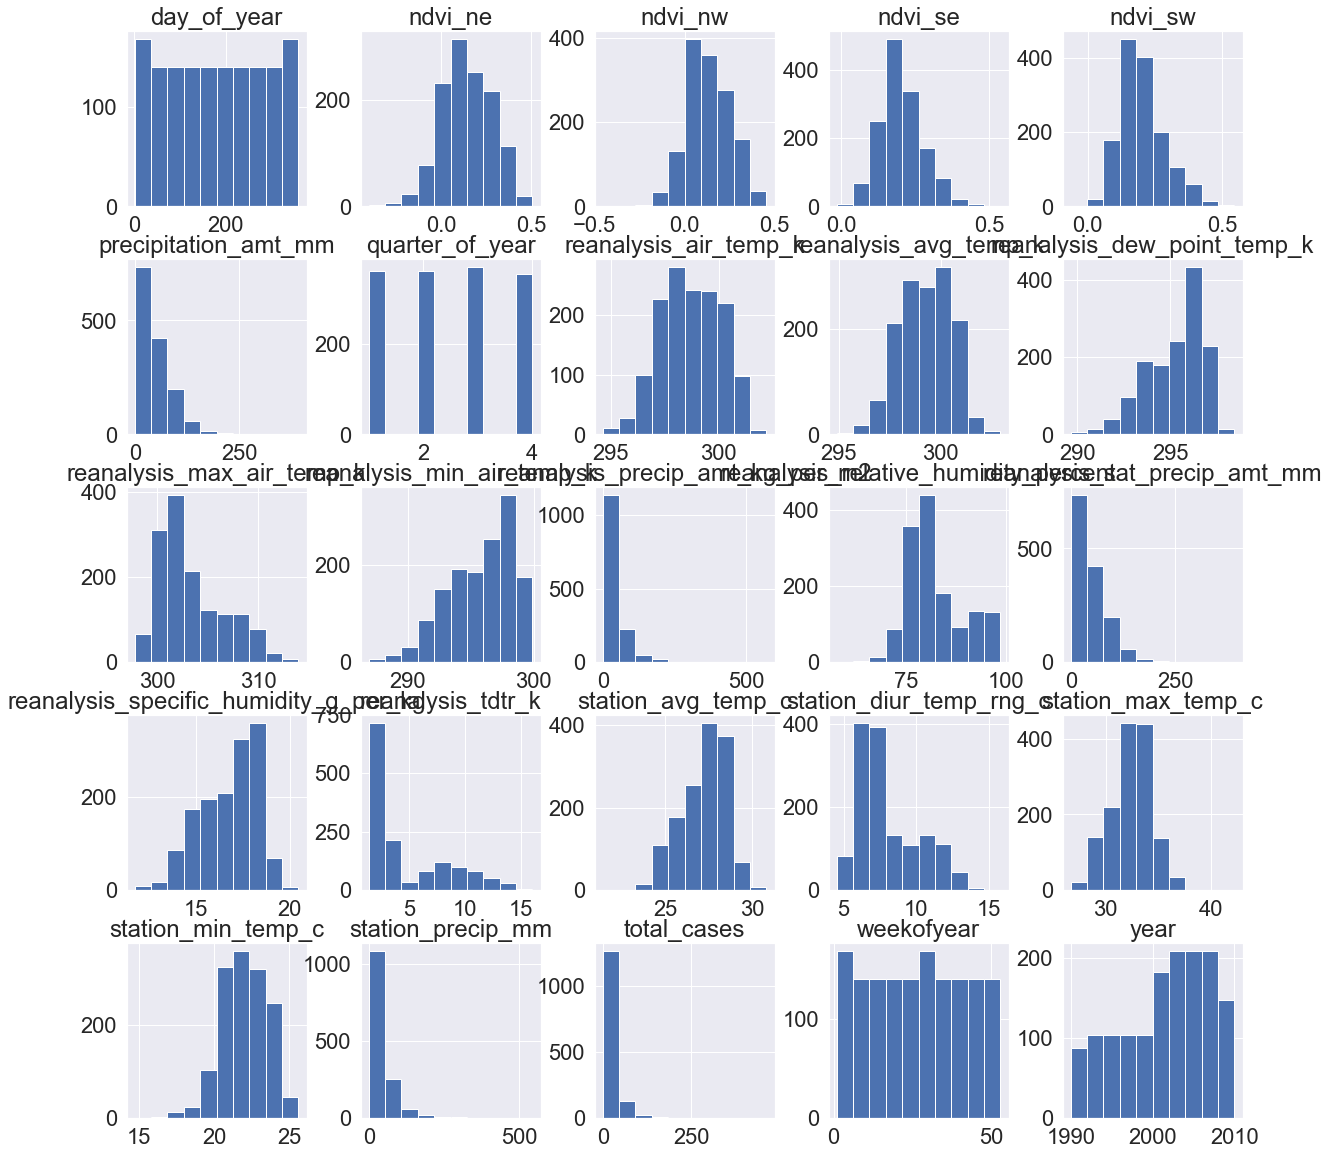

In [310]:
data.hist(figsize=(20, 20))

We could probably normalize several of these features, perhaps apply a log transformation or a box cox tranformation

In [311]:
#we have a few missing ndvi_ne, lets see if we can get their means by city to perhaps impute
city_ndvi_ne = data['ndvi_ne'].groupby(data['city'])
city_ndvi_ne.mean()

city
iq    0.263869
sj    0.057925
Name: ndvi_ne, dtype: float64

In [312]:
#replace all missing data by the mean of the year values
data['ndvi_ne'] = data.groupby('city').ndvi_ne.transform(lambda x: x.replace(np.nan, x.mean()))
data['ndvi_nw'] = data.groupby('city').ndvi_nw.transform(lambda x: x.replace(np.nan, x.mean()))
data['ndvi_se'] = data.groupby('city').ndvi_se.transform(lambda x: x.replace(np.nan, x.mean()))
data['ndvi_sw'] = data.groupby('city').ndvi_sw.transform(lambda x: x.replace(np.nan, x.mean()))

#now the precipitation
data['precipitation_amt_mm'] = data.groupby('city').precipitation_amt_mm.transform(lambda x: x.replace(np.nan, x.mean()))

#now the reanalysis values
data['reanalysis_air_temp_k'] = data.groupby('city').reanalysis_air_temp_k.transform(lambda x: x.replace(np.nan, x.mean()))
data['reanalysis_avg_temp_k'] = data.groupby('city').reanalysis_avg_temp_k.transform(lambda x: x.replace(np.nan, x.mean()))
data['reanalysis_dew_point_temp_k'] = data.groupby('city').reanalysis_dew_point_temp_k.transform(lambda x: x.replace(np.nan, x.mean()))
data['reanalysis_max_air_temp_k'] = data.groupby('city').reanalysis_max_air_temp_k.transform(lambda x: x.replace(np.nan, x.mean()))
data['reanalysis_min_air_temp_k'] = data.groupby('city').reanalysis_min_air_temp_k.transform(lambda x: x.replace(np.nan, x.mean()))
data['reanalysis_precip_amt_kg_per_m2'] = data.groupby('city').reanalysis_precip_amt_kg_per_m2.transform(lambda x: x.replace(np.nan, x.mean()))
data['reanalysis_relative_humidity_percent'] = data.groupby('city').reanalysis_relative_humidity_percent.transform(lambda x: x.replace(np.nan, x.mean()))
data['reanalysis_sat_precip_amt_mm'] = data.groupby('city').reanalysis_sat_precip_amt_mm .transform(lambda x: x.replace(np.nan, x.mean()))
data['reanalysis_specific_humidity_g_per_kg'] = data.groupby('city').reanalysis_specific_humidity_g_per_kg.transform(lambda x: x.replace(np.nan, x.mean()))
data['reanalysis_tdtr_k'] = data.groupby('city').reanalysis_tdtr_k.transform(lambda x: x.replace(np.nan, x.mean()))

#now station values
data['station_avg_temp_c'] = data.groupby('city').station_avg_temp_c.transform(lambda x: x.replace(np.nan, x.mean()))
data['station_diur_temp_rng_c'] = data.groupby('city').station_diur_temp_rng_c.transform(lambda x: x.replace(np.nan, x.mean()))
data['station_max_temp_c'] = data.groupby('city').station_max_temp_c.transform(lambda x: x.replace(np.nan, x.mean()))
data['station_min_temp_c'] = data.groupby('city').station_min_temp_c.transform(lambda x: x.replace(np.nan, x.mean()))
data['station_precip_mm'] = data.groupby('city').station_precip_mm.transform(lambda x: x.replace(np.nan, x.mean()))




In [313]:
data.isna().sum()

city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_pre

In [314]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import numpy.random as nr
import sklearn.model_selection as model_selection
import sklearn.metrics as metrics
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [315]:
data['city'] = data['city'].map({'sj': 1, 'iq':0})

In [316]:
data_dummies = pd.get_dummies(data, columns = ['week_start_date'])

In [317]:
data_dummies.shape

(1456, 1075)

In [318]:
features = data_dummies.drop('total_cases', axis = 1)
label = data_dummies['total_cases']

#scale the features
scale = preprocessing.StandardScaler()
scale.fit(features)
scaled_features = scale.transform(features)
scaled_features

# Splitting the observations into a training and a testing set for the holdout method
# Note: k-folds cross validation should be used for datasets less than 30,000 entries in order
#       to obtain a more realistic accuracy. 
X_train, X_test, y_train, y_test = train_test_split(features, label,
                                                    test_size=0.30, random_state=46)

C:\Users\Sam Cannon\Python\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning:

Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.



StandardScaler(copy=True, with_mean=True, with_std=True)

C:\Users\Sam Cannon\Python\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning:

Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.



array([[ 7.45355992e-01, -2.04044804e+00, -5.66356489e-01, ...,
        -2.62161253e-02, -2.62161253e-02, -2.62161253e-02],
       [ 7.45355992e-01, -2.04044804e+00, -4.99753222e-01, ...,
        -2.62161253e-02, -2.62161253e-02, -2.62161253e-02],
       [ 7.45355992e-01, -2.04044804e+00, -4.33149955e-01, ...,
        -2.62161253e-02, -2.62161253e-02, -2.62161253e-02],
       ...,
       [-1.34164079e+00,  1.65883268e+00, -2.33340154e-01, ...,
         3.81444622e+01, -2.62161253e-02, -2.62161253e-02],
       [-1.34164079e+00,  1.65883268e+00, -1.66736887e-01, ...,
        -2.62161253e-02,  3.81444622e+01, -2.62161253e-02],
       [-1.34164079e+00,  1.65883268e+00, -1.00133620e-01, ...,
        -2.62161253e-02, -2.62161253e-02,  3.81444622e+01]])

In [319]:
scaled_features.shape

(1456, 1074)

In [ ]:
xtraindf = pd.DataFrame(X_train)

In [ ]:
feature_importances = pd.DataFrame(rf_clf.feature_importances_,
                                   index = xtraindf.columns,
                                    columns=['importance']).sort_values('importance', ascending=True)

In [ ]:
feature_importances

In [74]:
test = pd.read_csv('dengue_test.csv')

In [75]:
test['ndvi_ne'] = test.groupby('city').ndvi_ne.transform(lambda x: x.replace(np.nan, x.mean()))
test['ndvi_nw'] = test.groupby('city').ndvi_nw.transform(lambda x: x.replace(np.nan, x.mean()))
test['ndvi_se'] = test.groupby('city').ndvi_se.transform(lambda x: x.replace(np.nan, x.mean()))
test['ndvi_sw'] = test.groupby('city').ndvi_sw.transform(lambda x: x.replace(np.nan, x.mean()))

#now the precipitation
test['precipitation_amt_mm'] = test.groupby('city').precipitation_amt_mm.transform(lambda x: x.replace(np.nan, x.mean()))

#now the reanalysis values
test['reanalysis_air_temp_k'] = test.groupby('city').reanalysis_air_temp_k.transform(lambda x: x.replace(np.nan, x.mean()))
test['reanalysis_avg_temp_k'] = test.groupby('city').reanalysis_avg_temp_k.transform(lambda x: x.replace(np.nan, x.mean()))
test['reanalysis_dew_point_temp_k'] = test.groupby('city').reanalysis_dew_point_temp_k.transform(lambda x: x.replace(np.nan, x.mean()))
test['reanalysis_max_air_temp_k'] = test.groupby('city').reanalysis_max_air_temp_k.transform(lambda x: x.replace(np.nan, x.mean()))
test['reanalysis_min_air_temp_k'] = test.groupby('city').reanalysis_min_air_temp_k.transform(lambda x: x.replace(np.nan, x.mean()))
test['reanalysis_precip_amt_kg_per_m2'] = test.groupby('city').reanalysis_precip_amt_kg_per_m2.transform(lambda x: x.replace(np.nan, x.mean()))
test['reanalysis_relative_humidity_percent'] = test.groupby('city').reanalysis_relative_humidity_percent.transform(lambda x: x.replace(np.nan, x.mean()))
test['reanalysis_sat_precip_amt_mm'] = test.groupby('city').reanalysis_sat_precip_amt_mm .transform(lambda x: x.replace(np.nan, x.mean()))
test['reanalysis_specific_humidity_g_per_kg'] = test.groupby('city').reanalysis_specific_humidity_g_per_kg.transform(lambda x: x.replace(np.nan, x.mean()))
test['reanalysis_tdtr_k'] = test.groupby('city').reanalysis_tdtr_k.transform(lambda x: x.replace(np.nan, x.mean()))

#now station values
test['station_avg_temp_c'] = test.groupby('city').station_avg_temp_c.transform(lambda x: x.replace(np.nan, x.mean()))
test['station_diur_temp_rng_c'] = test.groupby('city').station_diur_temp_rng_c.transform(lambda x: x.replace(np.nan, x.mean()))
test['station_max_temp_c'] = test.groupby('city').station_max_temp_c.transform(lambda x: x.replace(np.nan, x.mean()))
test['station_min_temp_c'] = test.groupby('city').station_min_temp_c.transform(lambda x: x.replace(np.nan, x.mean()))
test['station_precip_mm'] = test.groupby('city').station_precip_mm.transform(lambda x: x.replace(np.nan, x.mean()))




In [76]:
test.isna().sum()

city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_pre

In [77]:
test['city'] = test['city'].map({'sj': 1, 'iq':0})

In [78]:
test_dummies = pd.get_dummies(test, columns = ['week_start_date'])

In [79]:
# Get missing columns in the training test
missing_cols = set( data_dummies.columns ) - set( test_dummies.columns )
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    test_dummies[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
test = test_dummies[data_dummies.columns]

In [80]:
test.shape

(416, 1073)

In [81]:
#need to drop the labels from the test set
test.drop('total_cases', axis=1, inplace=True)

In [82]:
#scaler has already been fit to our training set, we should not fit it to our test set, simply transform with the same scale
test_features = scale.transform(test)
test_features

C:\Users\Sam Cannon\Python\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning:

Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.



array([[ 0.74535599,  1.28890461, -0.56635649, ..., -0.03708795,
        -0.03708795, -0.02621613],
       [ 0.74535599,  1.28890461, -0.49975322, ..., -0.03708795,
        -0.03708795, -0.02621613],
       [ 0.74535599,  1.28890461, -0.43314995, ..., -0.03708795,
        -0.03708795, -0.02621613],
       ...,
       [-1.34164079,  2.21372479, -0.16673689, ..., -0.03708795,
        -0.03708795, -0.02621613],
       [-1.34164079,  2.21372479, -0.10013362, ..., -0.03708795,
        -0.03708795, -0.02621613],
       [-1.34164079,  2.21372479, -0.03353035, ..., -0.03708795,
        -0.03708795, -0.02621613]])

In [83]:
test.shape
features.shape

(416, 1072)

(1456, 1072)

__Dude this is so weird, this problem can be classification or regression? whaat?__

In [267]:
def get_score(model, norm=False):
        '''
        Fits the model and returns a series containing the RMSE, MAE, and R^2
        '''
        from sklearn.metrics import mean_squared_error, mean_absolute_error
        import time

        startTime = time.time()  # Getting training time
        
        # Fits with either regular or normalized training set
        if norm == False:
            model.fit(X_train, y_train)
            totalTime = time.time() - startTime
            predictions = model.predict(X_test)
        
            r2 = model.score(X_test, y_test)
            rmse = np.sqrt(mean_squared_error(y_test, predictions))
            mae = mean_absolute_error(y_test, predictions)
        else:
            model.fit(X_train_norm, y_train)
            totalTime = time.time() - startTime
            predictions = model.predict(X_test_norm)
        
            r2 = model.score(X_test_norm, y_test)
            rmse = np.sqrt(mean_squared_error(y_test, predictions))
            mae = mean_absolute_error(y_test, predictions)
            
        score_results = pd.Series([r2, rmse, mae, totalTime], index=['R^2', 'RMSE', 'MAE', 'TrainingTime(sec)'])
        
        return score_results

In [268]:
# Linear regression - http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
from sklearn.linear_model import LinearRegression
lm = LinearRegression(n_jobs=-1)
lmScore = get_score(lm)
lmScore

R^2                 -1.110893e+19
RMSE                 1.718843e+11
MAE                  5.131922e+10
TrainingTime(sec)    2.772532e-01
dtype: float64

In [269]:
  # Decision tree - http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=None, min_samples_split=2, min_samples_leaf=1)
dtScore = get_score(dt)
dtScore

R^2                   0.072411
RMSE                 49.668144
MAE                  17.839817
TrainingTime(sec)     0.059836
dtype: float64

In [270]:
# k-NN - http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=8, n_jobs=-1)
knnScore = get_score(knn)
knnScore

R^2                   0.108104
RMSE                 48.703184
MAE                  22.090675
TrainingTime(sec)     0.039893
dtype: float64

In [271]:
# Random Forest - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, max_depth=None, n_jobs=-1, random_state=2)
rfScore = get_score(rf)
rfScore
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = xtraindf.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances

R^2                   0.199173
RMSE                 46.149775
MAE                  15.310892
TrainingTime(sec)     1.104049
dtype: float64

,importance
year,0.162991
weekofyear,0.103540
week_start_date_11/12/1994,0.073972
week_start_date_11/5/1994,0.073181
week_start_date_11/19/1994,0.056231
reanalysis_air_temp_k,0.051810
reanalysis_dew_point_temp_k,0.039590
week_start_date_9/24/1994,0.038347
week_start_date_8/6/1998,0.037744
reanalysis_specific_humidity_g_per_kg,0.037677


In [272]:
# Gradient Boosted Trees - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html
from sklearn.ensemble import GradientBoostingRegressor
gbt = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.1, max_depth=3, random_state=1)
gbtScore = get_score(gbt)
gbtScore

R^2                   0.346235
RMSE                 41.697581
MAE                  15.408902
TrainingTime(sec)    21.795710
dtype: float64

In [273]:
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import RobustScaler
ENet = ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3)
ENScore = get_score(ENet)
ENScore

C:\Users\Sam Cannon\Python\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.



R^2                   0.123841
RMSE                 48.271585
MAE                  22.239986
TrainingTime(sec)     0.897598
dtype: float64

In [274]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lassoScore = get_score(lasso)
lassoScore

R^2                   0.150441
RMSE                 47.533184
MAE                  21.270172
TrainingTime(sec)     0.353051
dtype: float64

In [275]:
import lightgbm as lgb
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
mlgbScore = get_score(model_lgb)
mlgbScore

R^2                   0.619415
RMSE                 31.814556
MAE                  15.782929
TrainingTime(sec)     0.304185
dtype: float64

# Stacking and averaging predictions

In [279]:
stacked_pred = (rf.predict(X_test) + gbt.predict(X_test) + model_lgb.predict(X_test) + lasso.predict(X_test))/4
from sklearn.metrics import mean_squared_error, mean_absolute_error
mean_absolute_error(y_test, stacked_pred)
np.sqrt(mean_squared_error(y_test, stacked_pred))

15.419375329609236

40.53628221477523

__this regression problem improved our score by a lot, I guess we should treat this as a regression problem now__

In [99]:
rfr_pred  = rfr.predict(test)
rfr_pred = rfr_pred.round()
pd.DataFrame(rfr_pred).to_csv('dengue_rf_pred2.csv')

Just adding in the AdaBoost improved our MAE by 1 point

In [84]:
from sklearn.ensemble import AdaBoostClassifier

In [87]:
abc = AdaBoostClassifier()
abc.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [88]:
predictions = (rf_clf.predict(test) + abc.predict(test) / 2)

In [89]:
len(predictions)

416

In [90]:
dengue_predictionsdf = pd.DataFrame(data=predictions)

In [91]:
dengue_predictionsdf.to_csv('dengue_predictions2.csv')